# US Police Shootings - Data visualisation

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:; border:0' role="tab" aria-controls="home"><center>Topics covered</center></h2>

* Overview
* About the victim
    * Gender spread
    * Location
    * Race
    * Age
* Situational information
    * Fleeing
    * Bodycam
    * Weapons

# Overview

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.style.use(['ggplot'])
plt.rcParams['figure.figsize']= (15,7)

The dataset provides a lot of situational information, including whether the victim was **fleeing**, if they were **armed** and whether the **body camera** of the police officer was in fact turned on. As well as this, the dataset also has information on the victim themselves, including **personal details** such as **race**, **age**, **name** and any exhibited signs of **mental illness**. 

These pieces of information could play a key role in determining whether there was any particular bias towards certain individuals.

In [211]:
df = pd.read_csv("/kaggle/input/us-police-shootings/shootings.csv")
df.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed


# The Victims

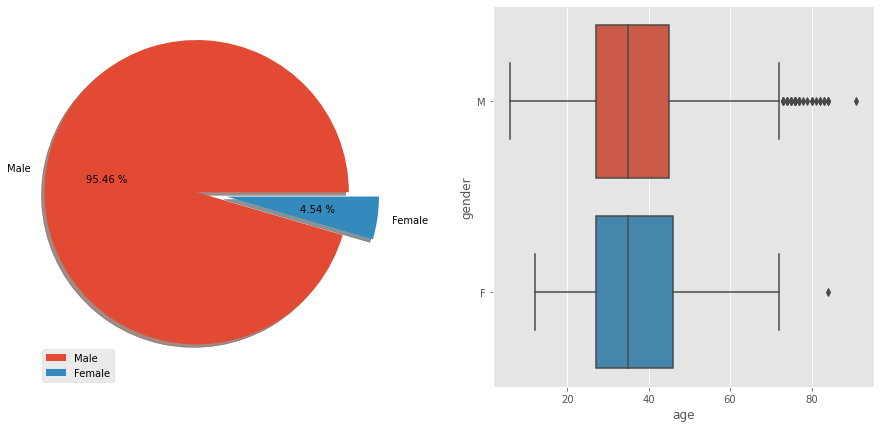

In [212]:
plt.subplot(121)
plt.pie(df["gender"].value_counts(), labels=["Male", "Female"], shadow=True, autopct="%.2f %%", explode=[0.2, 0.0])
plt.legend()
plt.subplot(122)
sns.boxplot(y="gender",x="age", data=df, orient='h')
plt.show()

Even though the data suggests that more men are killed compared to women, the average age of the victims is roughly the same. However, there are far more outliers for men but this is not significant as it is to be expected due to the large difference in the counts. We can also check the average spread of mental illness per gender. 

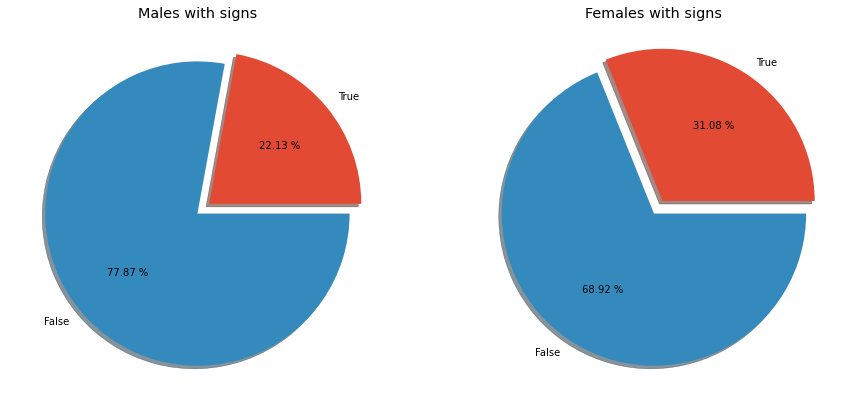

In [213]:
scores = {'M_true':0, "M_false":0, "F_true":0, 'F_false':0}
for i in df[["gender","signs_of_mental_illness"]].values:
    if i[1]:
        scores[i[0]+"_true"] += 1
    else:
        scores[i[0]+"_false"] += 1

plt.subplot(121)
plt.pie([*scores.values()][:2], labels=["True", "False"], autopct="%.2f %%", explode=[0.1, 0.0], shadow=True)
plt.title("Males with signs")

plt.subplot(122)
plt.pie([*scores.values()][2:], labels=["True", "False"], autopct="%.2f %%", explode=[0.1, 0.0], shadow=True)
plt.title("Females with signs")
plt.show()

As you can see, a significantly larger proportion of females exhibit signs of mental illness. As well as just gender, the dataset also allows you to visualise by racial statistics.

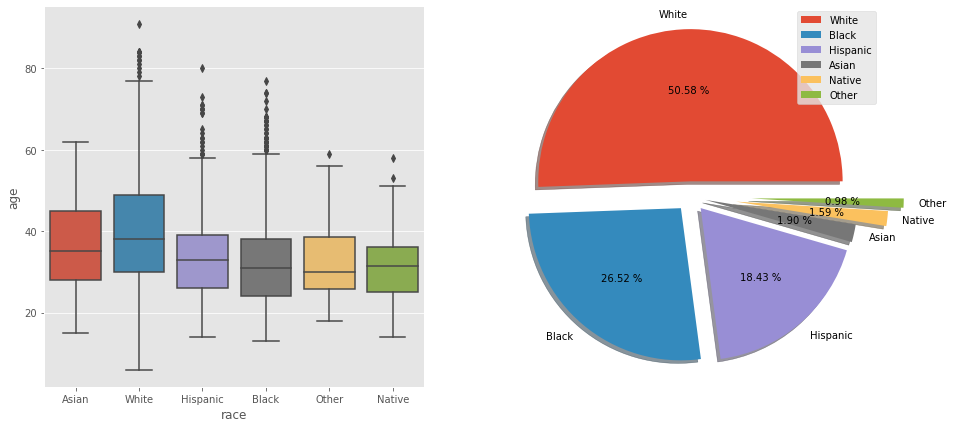

In [214]:
plt.subplot(122)
plt.pie(df["race"].value_counts(), labels=df["race"].value_counts().index, shadow=True, autopct="%.2f %%", explode=[0.1,0.1,0.1,0.1,0.3,0.4])
plt.legend()

plt.subplot(121)
sns.boxplot(x="race",y="age", data=df)
plt.show()

Most of the victims are white, however, they seem to also be the oldest when shot, whereas the black, hispanic and native victims have a much lower average. This could indicate that these victims are pulled into crime earlier, or in the case of the abuse of power, more likely victims. In this case, black victims are on average the second youngest to become victims to shootings. What about per state statistics?

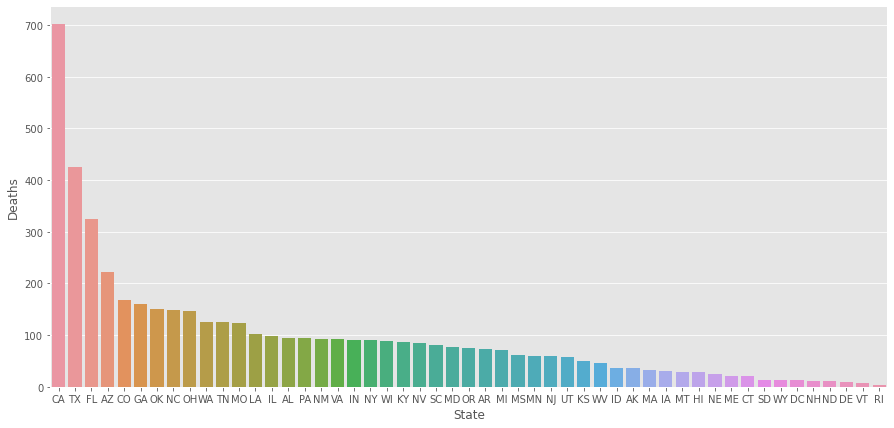

In [215]:
states = [*df["state"].value_counts().index]
races = df["race"].value_counts().index

scores = {r:pd.Series([0 for _ in range(len(states))]) for r in [*races, "all"]}
scores["state"] = states

for i in range(len(df)):
    scores[df["race"][i]][states.index(df["state"][i])] += 1
    scores["all"][states.index(df["state"][i])] += 1
    
scores = pd.DataFrame.from_dict(scores)
sns.barplot(x="state", y="all", data=scores)
plt.ylabel("Deaths")
plt.xlabel("State")
plt.show()

Looks like the per state statistics show a huge leap in killings from CA (California) to TX (Texas), with just under double! Not only this, but the first 10 states take up for most of the deaths. This shows how only a few states are mostly contributing to the total, which could suggest a misuse of power. Let's take a look at the statistics on a per race case (do note, that the scale for the y-axis, deaths, is not constant).

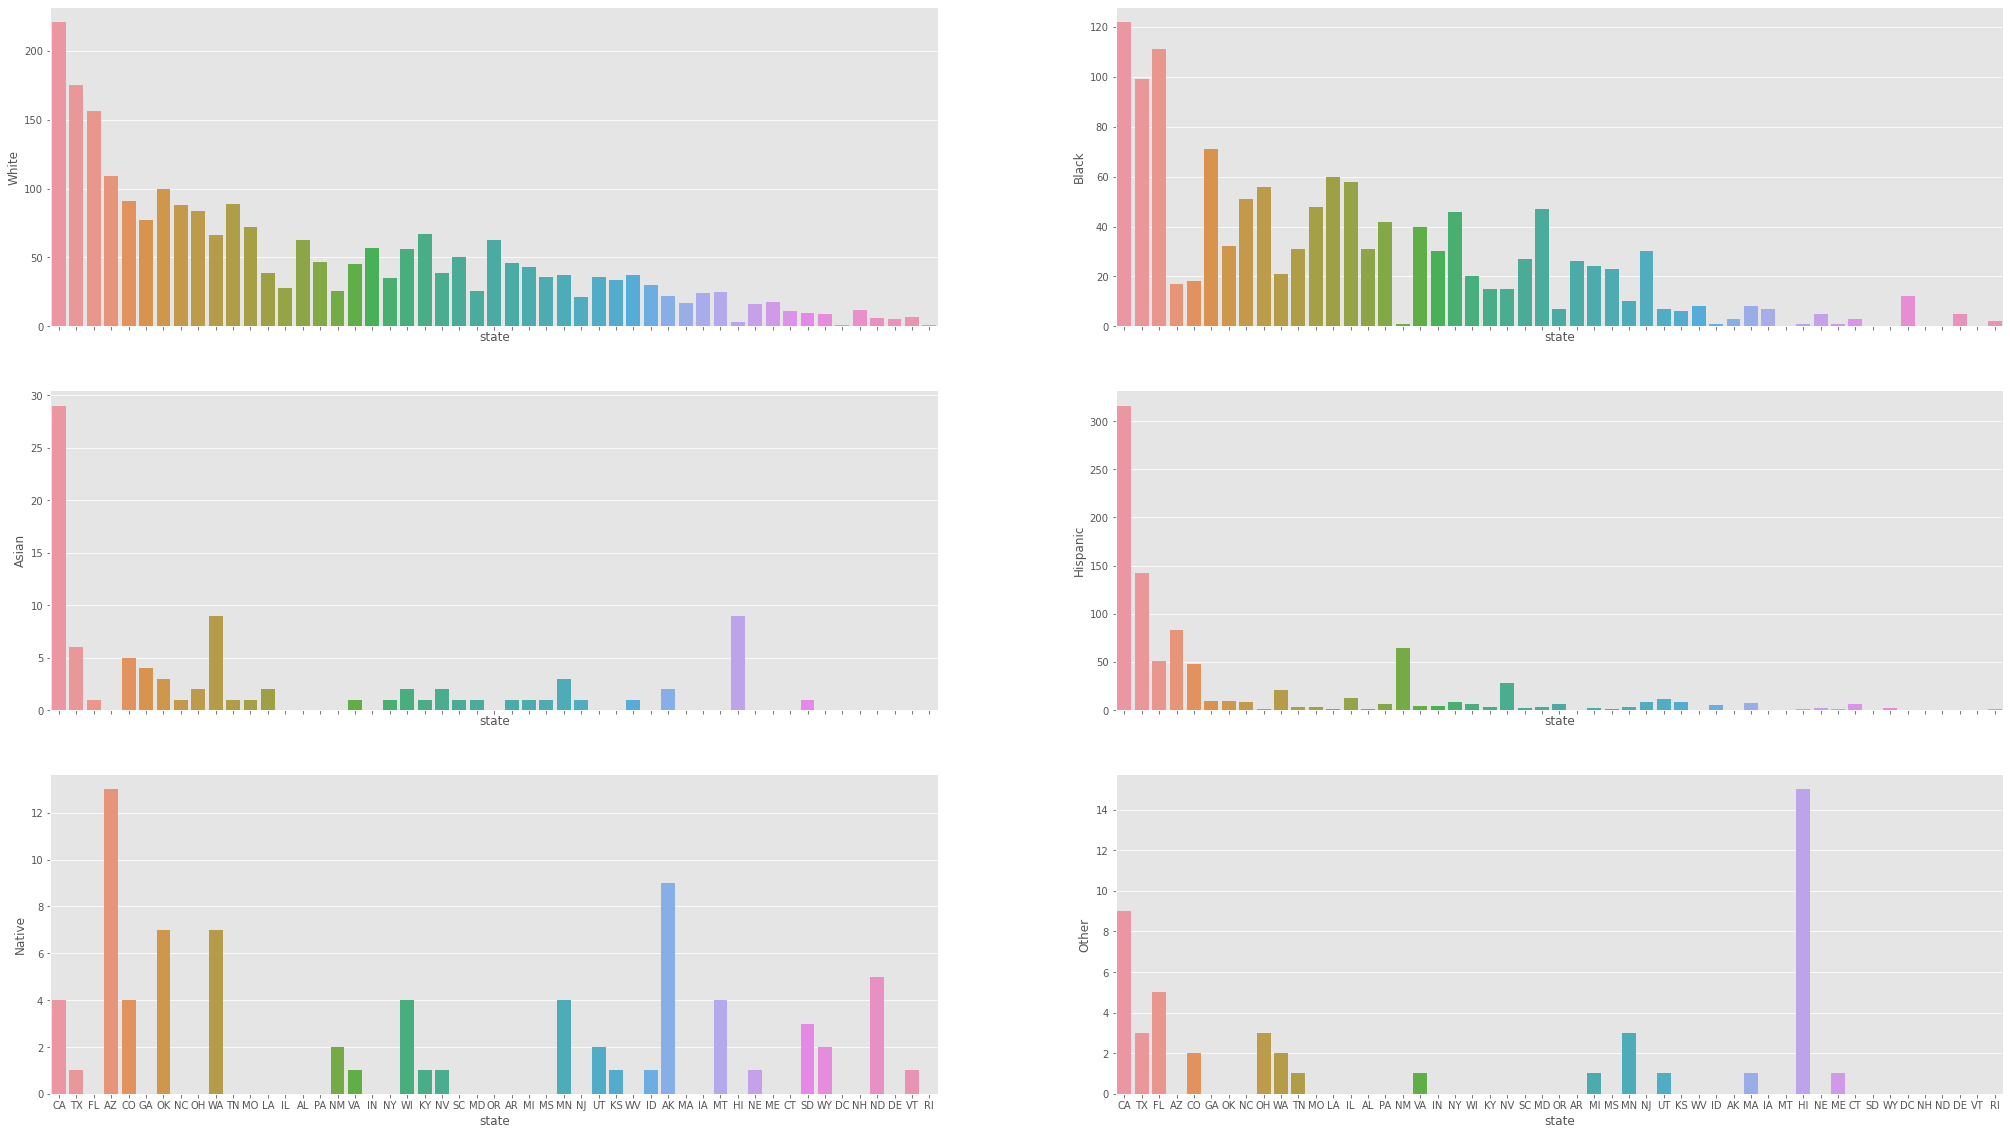

In [216]:
_, axes = plt.subplots(3,2, sharex=True, figsize=(35,20))
sns.barplot(x="state", y="White", data=scores,ax=axes[0,0])
sns.barplot(x="state", y="Black", data=scores,ax=axes[0,1])
sns.barplot(x="state", y="Asian", data=scores,ax=axes[1,0])
sns.barplot(x="state", y="Hispanic", data=scores,ax=axes[1,1])
sns.barplot(x="state", y="Native", data=scores,ax=axes[2,0])
sns.barplot(x="state", y="Other", data=scores,ax=axes[2,1])

plt.show()

These statistics are not indicative, however against racial prejudice, as the population living in the states can have a large amount of the national percentage living there. For example, take HI (Hawaii), which has a large native Hawaiians, who do not fall under each category, thus the state has the most victims under the "Other" category. To be clearer on whether it's influenced by the location, or on biases it is necessary to delve deeper into the per city data. Take FL (Florida), for example.

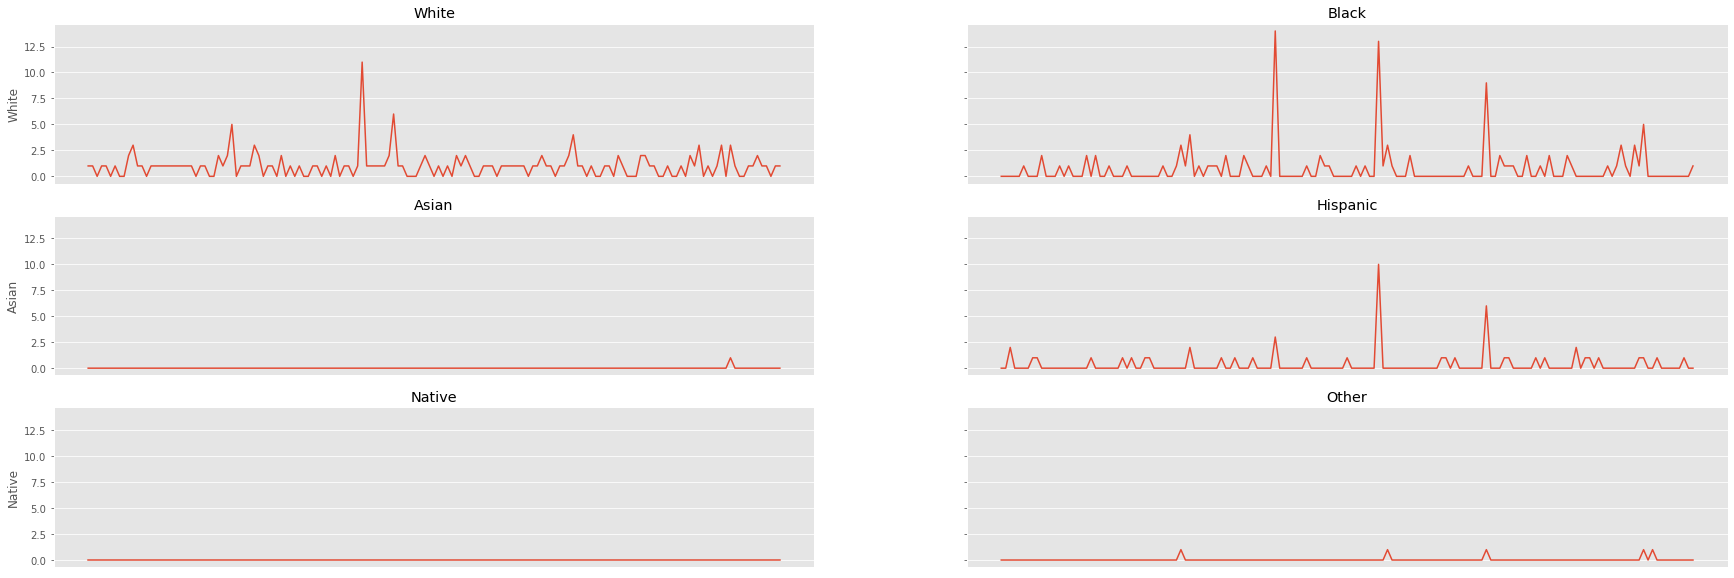

Top 3 Cities (peaks in graph above) : Black    : ['Jacksonville', 'Miami', 'Orlando']
Top 3 Cities (peaks in graph above) : Hispanic : ['Miami', 'Orlando', 'Jacksonville']
Top 3 Cities (peaks in graph above) : White    : ['Jacksonville', 'Lakeland', 'Deltona']


In [228]:
state = "FL"

cities = [*set(df[df["state"] == state]["city"])]
races = df["race"].value_counts().index

scores = {r:pd.Series([0 for _ in range(len(cities))]) for r in [*races, "all"]}
scores["city"] = cities
for i in range(len(df)):
    if df["state"][i] == state:
        scores[df["race"][i]][cities.index(df["city"][i])] += 1
        scores["all"][cities.index(df["city"][i])] += 1
    
scores = pd.DataFrame.from_dict(scores)

_, axes = plt.subplots(3,2, sharex=True, sharey=True, figsize=(30,10))
for i in axes.flat:
    i.get_xaxis().set_ticks([])

sns.lineplot(x="city", y="White", data=scores,ax=axes[0,0])
sns.lineplot(x="city", y="Black", data=scores,ax=axes[0,1])
sns.lineplot(x="city", y="Asian", data=scores,ax=axes[1,0])
sns.lineplot(x="city", y="Hispanic", data=scores,ax=axes[1,1])
sns.lineplot(x="city", y="Native", data=scores,ax=axes[2,0])
sns.lineplot(x="city", y="Other", data=scores,ax=axes[2,1])

axes[0,0].set_title("White")
axes[0,1].set_title("Black")
axes[1,0].set_title("Asian")
axes[1,1].set_title("Hispanic")
axes[2,0].set_title("Native")
axes[2,1].set_title("Other")

plt.show()

print(f"Top 3 Cities (peaks in graph above) : Black    : {[*scores.sort_values('Black')[::-1]['city'][:3]]}")
print(f"Top 3 Cities (peaks in graph above) : Hispanic : {[*scores.sort_values('Hispanic')[::-1]['city'][:3]]}")
print(f"Top 3 Cities (peaks in graph above) : White    : {[*scores.sort_values('White')[::-1]['city'][:3]]}")

This seems more interesting, as there is a clear relationship with the city that Black or Hispanic victims live in. For example, look at Miami and Orlando, which have the one of the most Hispanic and Black victims, whereas Jacksonville is in the top 3 for all White, Black and Hispanic victims. Looking at the higher (on average) white victims overall, this could mean that Jacksonville has a high population in general. This is supported by https://www.florida-demographics.com/cities_by_population, which also shows that Orlando and Miami are one of the most populous cities. However, it is interesting that neither Miami nor Orlando show up with the White victims. This could suggest that either there is a larger crime rates by the Hispanic or Black population or it could suggest that there is indeed a bias in race of victims.

# Situational Information

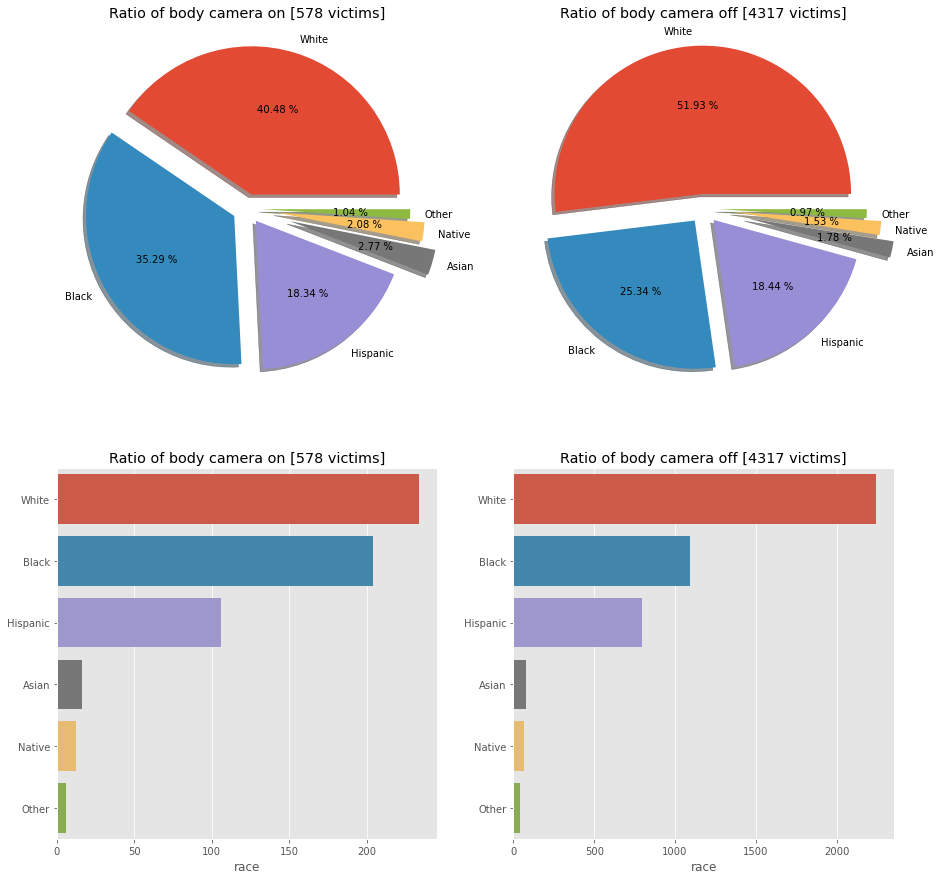

In [218]:
body_cam_off = df[df["body_camera"] == False]
body_cam_on = df[df["body_camera"] == True]

_, axes = plt.subplots(2, 2, figsize=(15,15))

axes[0, 0].pie(body_cam_on["race"].value_counts(), labels=body_cam_on["race"].value_counts().index, autopct="%.2f %%", shadow=True, explode=[0.1, 0.1, 0.1, 0.3, 0.2, 0.1])
axes[0, 0].set_title(f"Ratio of body camera on [{len(body_cam_on)} victims]")

axes[0, 1].pie(body_cam_off["race"].value_counts(), labels=body_cam_off["race"].value_counts().index, autopct="%.2f %%", shadow=True, explode=[0.1, 0.1, 0.1, 0.3, 0.2, 0.1])
axes[0, 1].set_title(f"Ratio of body camera off [{len(body_cam_off)} victims]")

sns.barplot(body_cam_on["race"].value_counts(), body_cam_on["race"].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title(f"Ratio of body camera on [{len(body_cam_on)} victims]")

sns.barplot(body_cam_off["race"].value_counts(), body_cam_off["race"].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title(f"Ratio of body camera off [{len(body_cam_off)} victims]")

plt.show()

There are over 7 times more cases with the body camera off. The ratios of the races of the victims don't show anything significant even though the ratio of blacks victims to white victims is slightly different. However, laws around body cameras vary from state to state, so we need to also look at the distribution per state. 

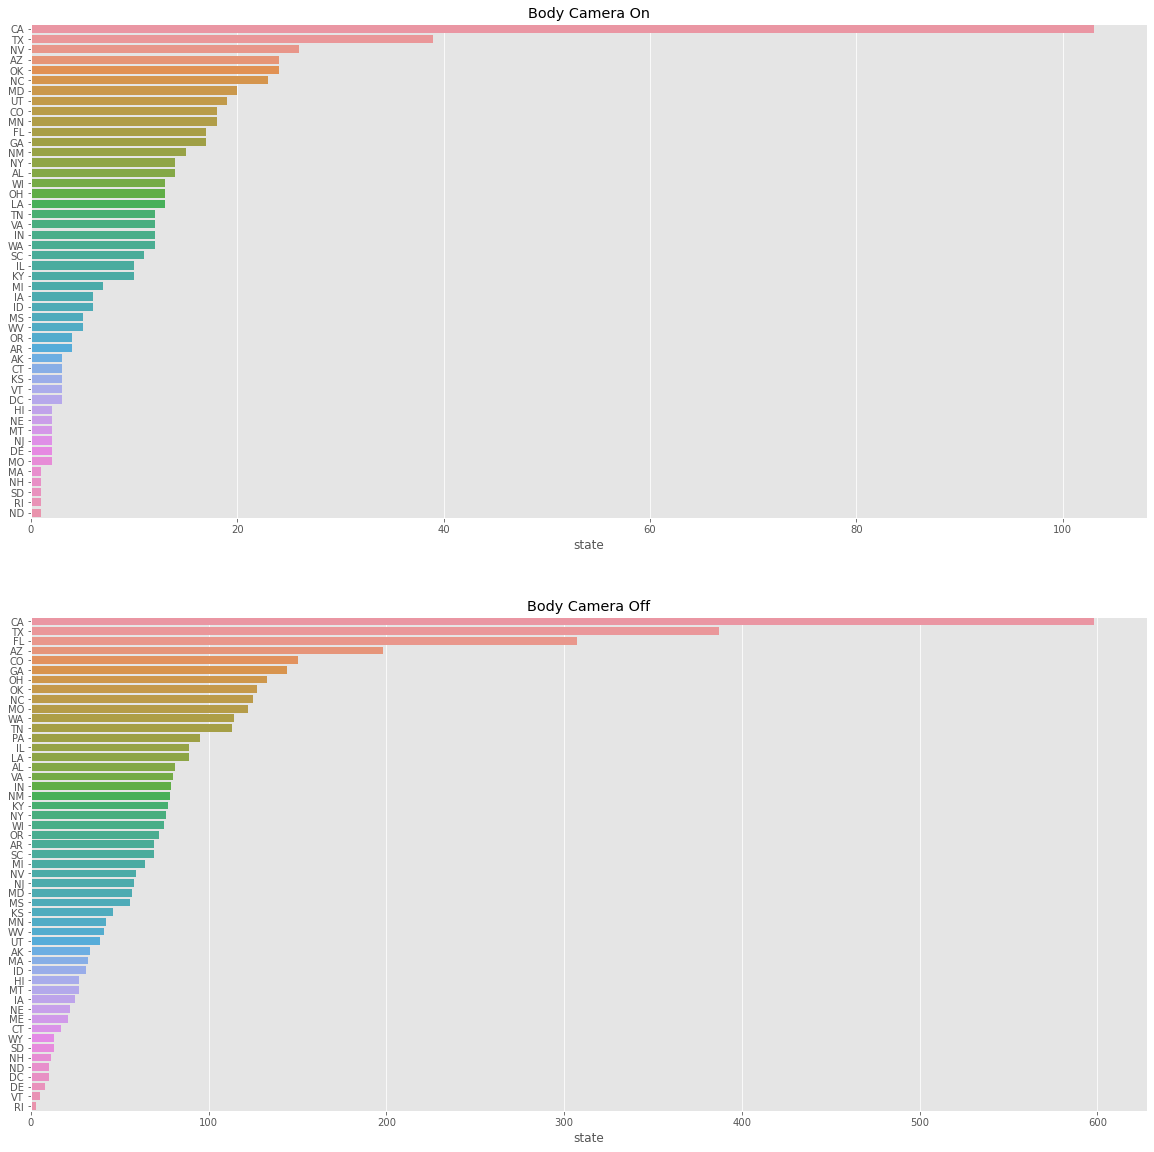

In [219]:
_, axes = plt.subplots(2,1, figsize=(20, 20))
sns.barplot(x=body_cam_on["state"].value_counts(), y=body_cam_on["state"].value_counts().index, ax=axes[0])
sns.barplot(x=body_cam_off["state"].value_counts(), y=body_cam_off["state"].value_counts().index, ax=axes[1])

axes[0].set_title("Body Camera On")
axes[1].set_title("Body Camera Off")
plt.show()

Next, let's look at whether the victim was armed and with what

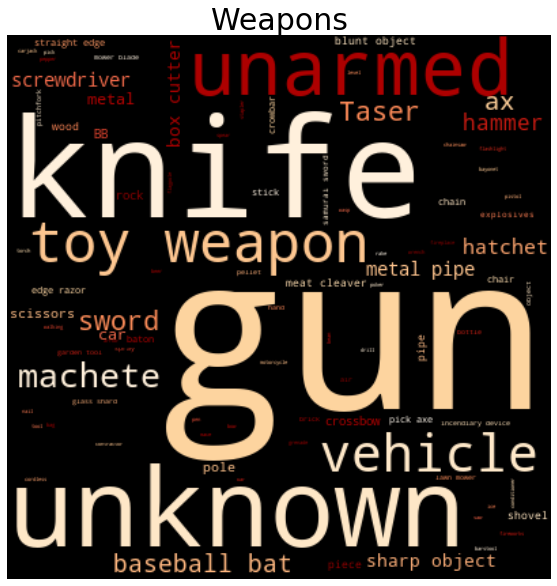

In [220]:
weapons = [*df["armed"]]
_, ax = plt.subplots(1,1, figsize=(17,10))
wordcloud = WordCloud(colormap="OrRd_r", width=400, height=400).generate(" ".join(weapons))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title("Weapons", fontsize=30)
plt.show()

The wordcloud shows that the some most used weapons are guns, knives and unarmed. Let's have a look at the unarmed cases.

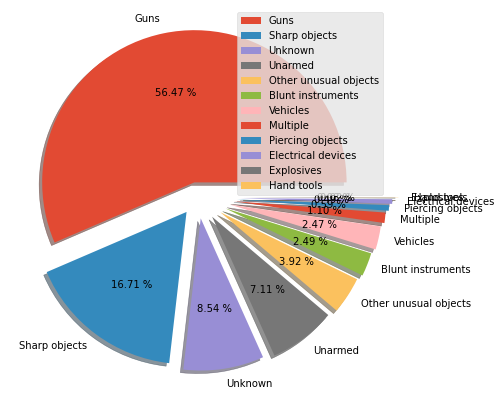

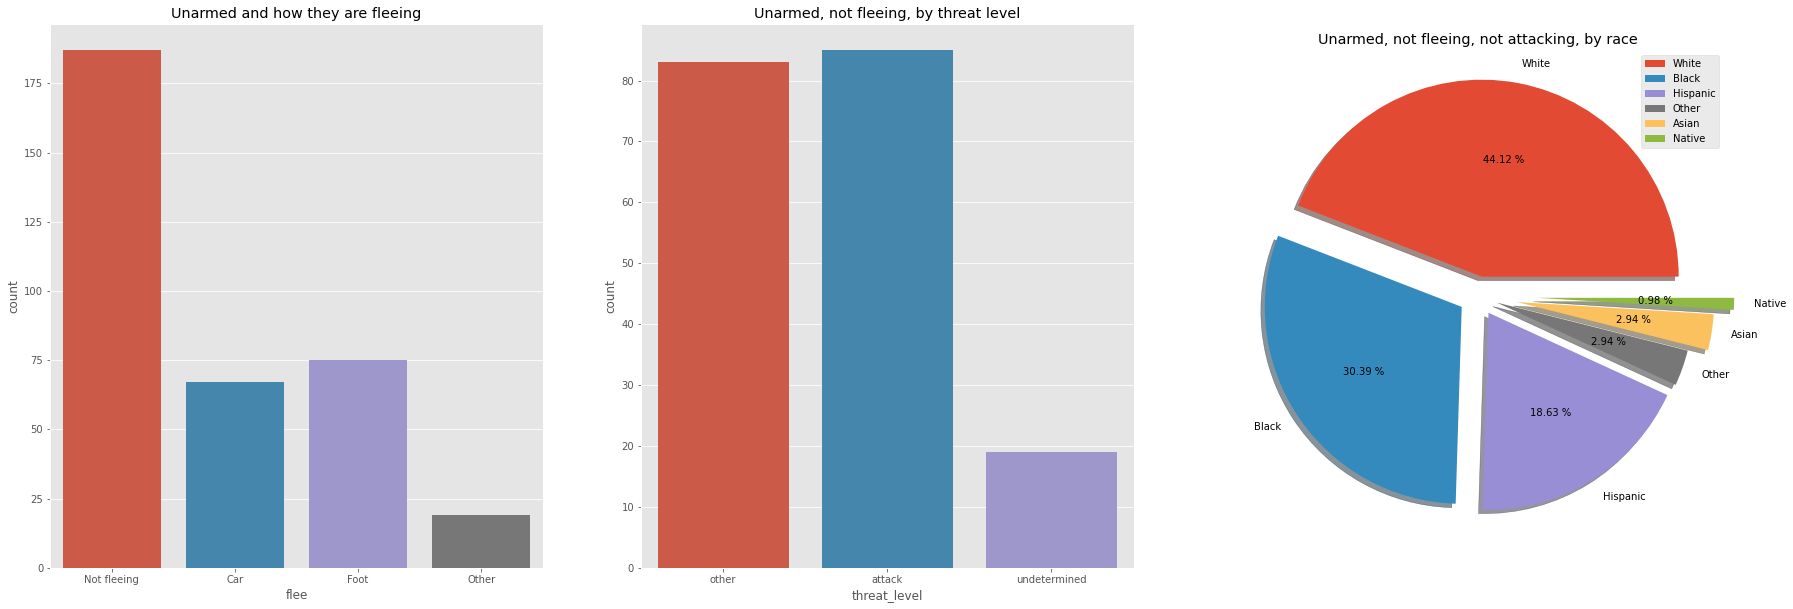

In [221]:
unarmed = df[df["arms_category"] == "Unarmed"]
unarmed_notFleeing = unarmed[unarmed["flee"] == "Not fleeing"]
unarmed_notFleeing_notAttacking = unarmed_notFleeing[unarmed_notFleeing["threat_level"] != "attack"]

plt.pie(df["arms_category"].value_counts(), labels=df["arms_category"].value_counts().index, autopct="%.2f %%", shadow=True, explode=[0.1 + (0.02*i) for i in range(len(set(df["arms_category"])))])
plt.legend()
plt.show()

_, axes = plt.subplots(1,3, figsize=(30,10))
sns.countplot(x="flee", data=unarmed, ax=axes[0])
sns.countplot(x="threat_level", data=unarmed_notFleeing, ax=axes[1])
axes[2].pie(unarmed_notFleeing_notAttacking["race"].value_counts(), labels=unarmed_notFleeing_notAttacking["race"].value_counts().index, autopct="%.2f %%", shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.2, 0.3])


axes[0].set_title("Unarmed and how they are fleeing")
axes[1].set_title("Unarmed, not fleeing, by threat level")
axes[2].set_title("Unarmed, not fleeing, not attacking, by race")
axes[2].legend()
plt.show()

Unfortunately, a lot of the cases included those that are not fleeing and the threat level is "undetermined" or "other". However, this data only represents a small proportion (7%) of all the cases, though it does show that out of those cases, those that were victims and unarmed were more likely to be considered a lower threat level than attacking, which is shocking in any case.